In [1]:
## We first load in packages we will need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("../../Data/used_cars.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [4]:
df.duplicated().sum()


np.int64(0)

In [5]:
df.dtypes

brand           object
model           object
model_year       int64
milage          object
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price           object
dtype: object

In [6]:
df.nunique()


brand             57
model           1898
model_year        34
milage          2818
fuel_type          7
engine          1146
transmission      62
ext_col          319
int_col          156
accident           2
clean_title        1
price           1569
dtype: int64

In [7]:
df['fuel_type'].unique()

array(['E85 Flex Fuel', 'Gasoline', 'Hybrid', nan, 'Diesel',
       'Plug-In Hybrid', '–', 'not supported'], dtype=object)

In [8]:
gas = df.loc[(df['fuel_type']=='–')|(df['fuel_type']=='not supported')]
gas.shape

(47, 12)

In [9]:
gas = df.loc[pd.isna(df['fuel_type'])]
gas.head()


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
9,Tesla,Model X Long Range Plus,2020,"34,000 mi.",NaN,534.0HP Electric Motor Electric Fuel System,A/T,Black,Black,None reported,Yes,"$69,950"
44,Lucid,Air Grand Touring,2022,"3,552 mi.",NaN,536.0HP Electric Motor Electric Fuel System,1-Speed A/T,Red,Beige,None reported,Yes,"$119,999"
68,Lucid,Air Grand Touring,2022,"4,900 mi.",NaN,536.0HP Electric Motor Electric Fuel System,1-Speed A/T,Red,Black,None reported,Yes,"$99,000"
92,Rivian,R1S Adventure Package,2023,"2,800 mi.",NaN,835.0HP Electric Motor Electric Fuel System,1-Speed A/T,White,Green,None reported,Yes,"$92,000"
122,Rivian,R1S Adventure Package,2023,"2,500 mi.",NaN,835.0HP Electric Motor Electric Fuel System,A/T,Green,White,None reported,Yes,"$94,000"


In [10]:
def clean_price_column(text:str) -> float:
    text = text[1:] # removes leading $
    return float(text.replace(',','')) # removes comma and converts to float

In [11]:
df['price'] = df['price'].apply(clean_price_column)

In [12]:
def clean_milage_column(text:str) -> float:
    text = text.replace(',','')
    return float(text.replace(' mi.', ''))

df['milage'] = df['milage'].apply(clean_milage_column)

In [13]:
def year_to_age(y:int) -> int:
    return 2024-y

df['model_year'] = df['model_year'].apply(year_to_age)
df.rename(columns = {'model_year':'age'},inplace = True)
df.head()

,brand,model,age,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,11,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0
1,Hyundai,Palisade SEL,3,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0
2,Lexus,RX 350 RX 350,2,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598.0
3,INFINITI,Q50 Hybrid Sport,9,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500.0
4,Audi,Q3 45 S line Premium Plus,3,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999.0


array([[<Axes: title={'center': 'price'}>]], dtype=object)

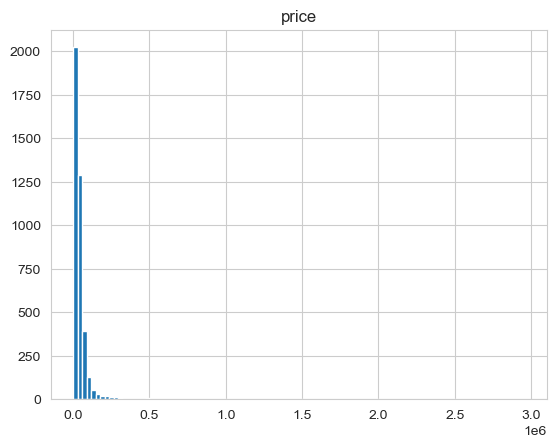

In [14]:
df.hist(column = 'price',bins=100)

In [15]:
df.price.describe()

count    4.009000e+03
mean     4.455319e+04
std      7.871064e+04
min      2.000000e+03
25%      1.720000e+04
50%      3.100000e+04
75%      4.999000e+04
max      2.954083e+06
Name: price, dtype: float64

In [16]:
price_lower_limit, price_upper_limit = np.percentile(a=df.price,q=[0.5,99.5])
milage_lower_limit, milage_upper_limit = np.percentile(a=df.milage,q=[0.5,99.5])
age_lower_limit, age_upper_limit = np.percentile(a=df.age,q=[0.5,99.5])
print(price_lower_limit,price_upper_limit)
print(milage_lower_limit,milage_upper_limit)
print(age_lower_limit,age_upper_limit)


3500.0 398303.64000000147
300.96 244000.0
1.0 29.0


In [17]:
df_filtered = df[(df.price>price_lower_limit) & (df.price<price_upper_limit)\
                  & (df.milage>milage_lower_limit) & (df.milage<milage_upper_limit)\
                  & (df.age>age_lower_limit) & (df.age<age_upper_limit)]

df_filtered.shape

(3689, 12)

array([[<Axes: title={'center': 'price'}>]], dtype=object)

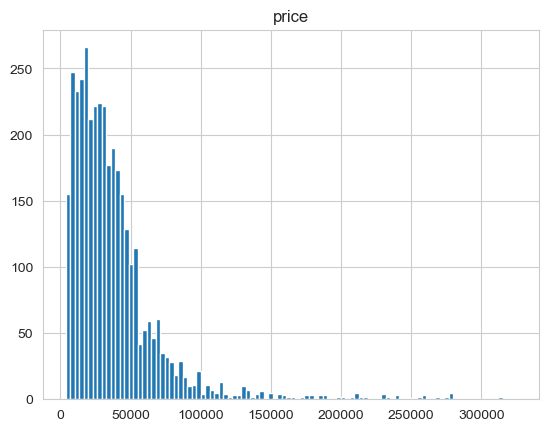

In [18]:
df_filtered.hist(column = 'price',bins=100)

array([[<Axes: title={'center': 'age'}>]], dtype=object)

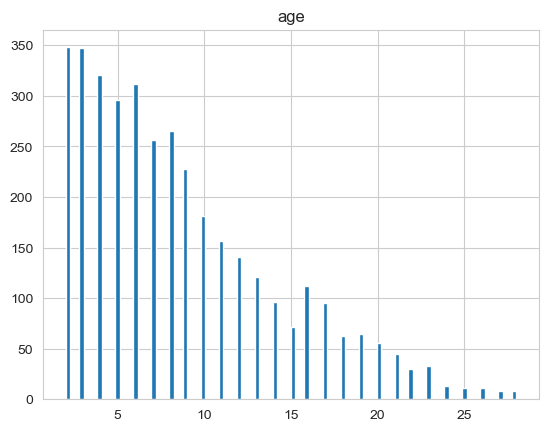

In [24]:
df_filtered.hist(column = 'age',bins=100)

array([[<Axes: title={'center': 'milage'}>]], dtype=object)

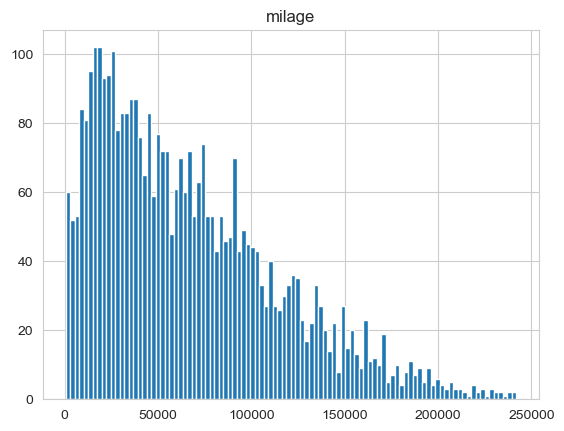

In [25]:
df_filtered.hist(column = 'milage',bins=100)

In [20]:
features = ['milage','age']

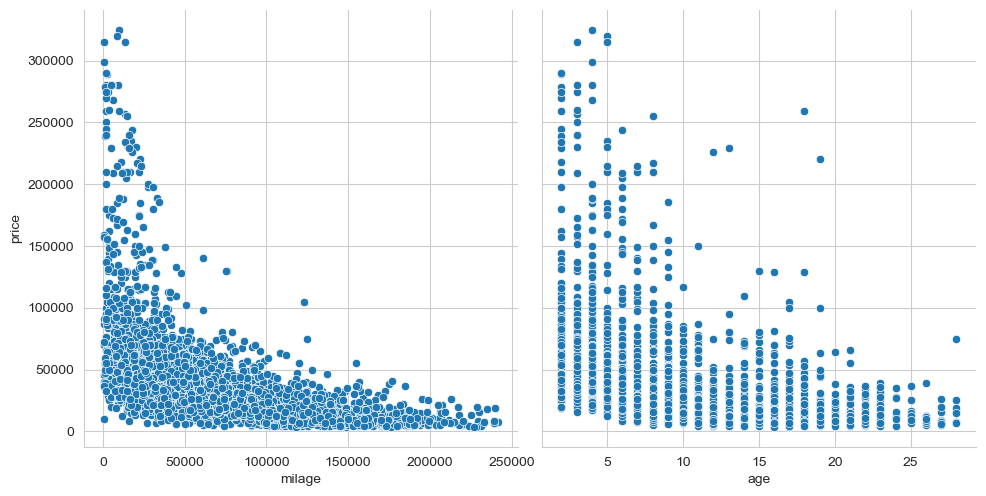

In [21]:
sns.pairplot(df_filtered,
                y_vars = ['price'],
                x_vars = features,
                height = 5,
                diag_kind = None)

plt.show()

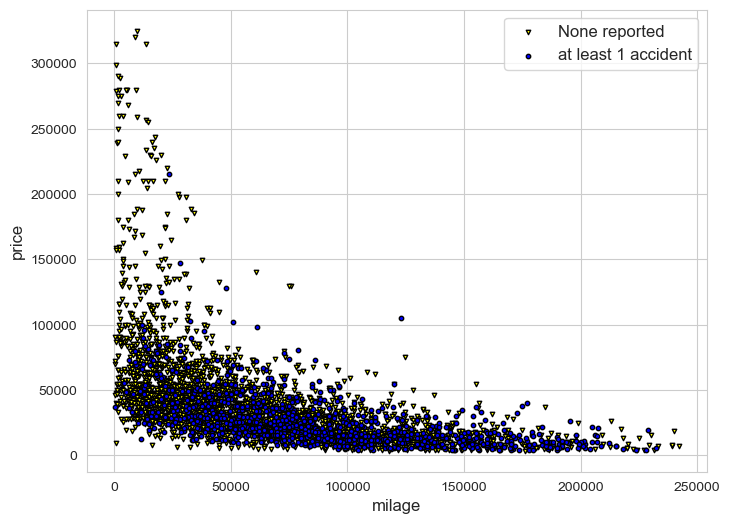

In [23]:
plt.figure(figsize=(8,6))

plt.scatter(df_filtered.loc[df_filtered.accident=='None reported'].milage,
               df_filtered.loc[df_filtered.accident=='None reported'].price,
               label="None reported",
               marker='v',
               s=10,
               edgecolor='black',
               c='yellow')
plt.scatter(df_filtered.loc[df_filtered.accident=='At least 1 accident or damage reported'].milage,
               df_filtered.loc[df_filtered.accident=='At least 1 accident or damage reported'].price,
               label="at least 1 accident",
               s=10,
               edgecolor='black',
               c='blue')

plt.xlabel("milage", fontsize=12)
plt.ylabel("price", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=12)

plt.show()

In [26]:
df['clean_title'].unique()

array(['Yes', nan], dtype=object)

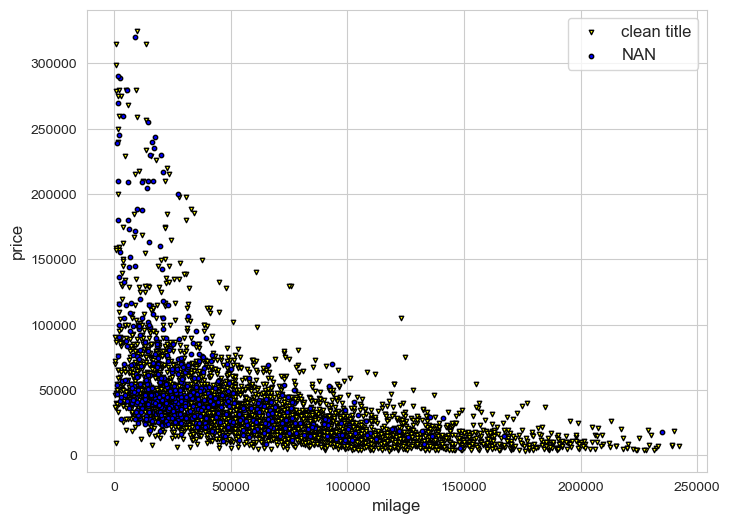

In [37]:
plt.figure(figsize=(8,6))

plt.scatter(df_filtered.loc[df_filtered.clean_title=='Yes'].milage,
               df_filtered.loc[df_filtered.clean_title=='Yes'].price,
               label="clean title",
               marker='v',
               s=10,
               edgecolor='black',
               c='yellow')

plt.scatter(df_filtered.loc[pd.isna(df_filtered.clean_title)].milage,
               df_filtered.loc[pd.isna(df_filtered.clean_title)].price,
               label="NAN",
               s=10,
               edgecolor='black',
               c='blue')

plt.xlabel("milage", fontsize=12)
plt.ylabel("price", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=12)

plt.show()

In [39]:
df_filtered.clean_title.describe()

count     3160
unique       1
top        Yes
freq      3160
Name: clean_title, dtype: object

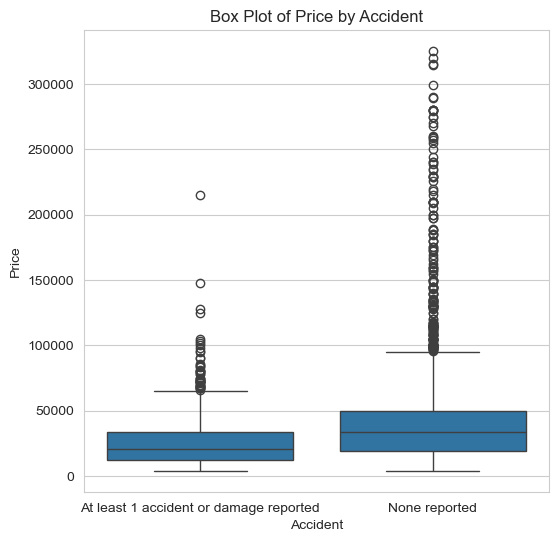

In [43]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='accident', y='price', data=df_filtered)
plt.title('Box Plot of Price by Accident')
plt.xlabel('Accident')
plt.ylabel('Price')
plt.show()